In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:12<00:00, 109MB/s]
100% 1.06G/1.06G [00:12<00:00, 88.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators for handling large dataset

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

# images stored in numpy array from 0 to 255

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalization to change all pixel values in range 0 to 1

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
# create cnn model

# three cnn layers
# with batchnormalization preventing overfitting remove it to see difference

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 111ms/step - loss: 1.1365 - accuracy: 0.5810 - val_loss: 0.6879 - val_accuracy: 0.6234
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5994 - accuracy: 0.6783 - val_loss: 0.5943 - val_accuracy: 0.6880
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5219 - accuracy: 0.7360 - val_loss: 0.5375 - val_accuracy: 0.7164
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4628 - accuracy: 0.7738 - val_loss: 0.4706 - val_accuracy: 0.7708
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4196 - accuracy: 0.8052 - val_loss: 0.4752 - val_accuracy: 0.7784
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3570 - accuracy: 0.8353 - val_loss: 0.4486 - val_accuracy: 0.7948
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2896 - accuracy: 0.8672 - val_loss: 0.4778 - val_ac

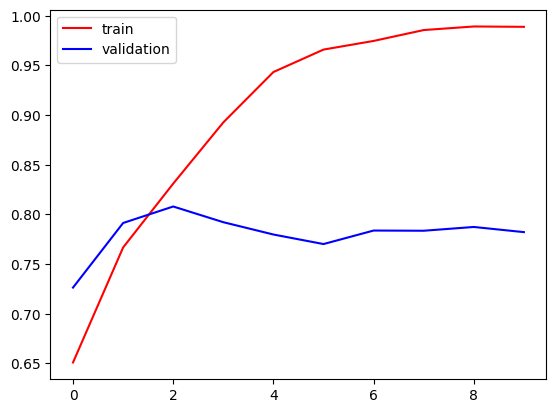

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

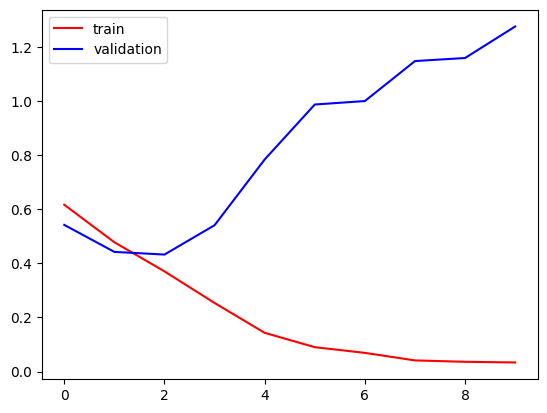

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

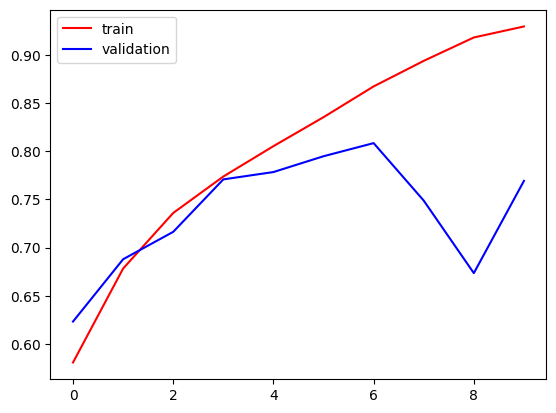

In [ ]:
# overfitting happening after tunning
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


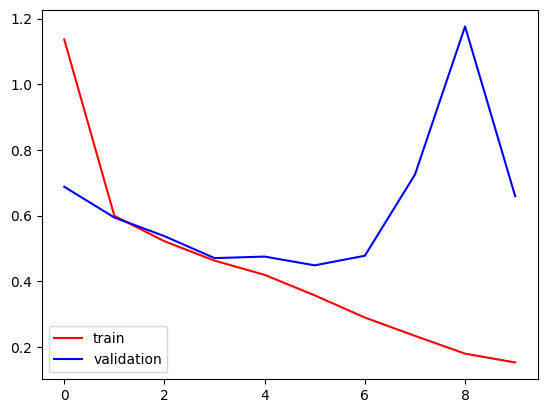

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

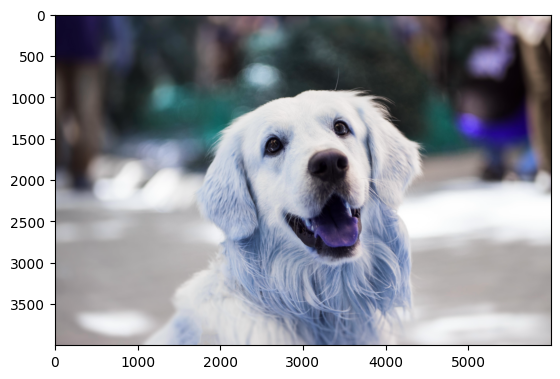

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(4000, 6000, 3)

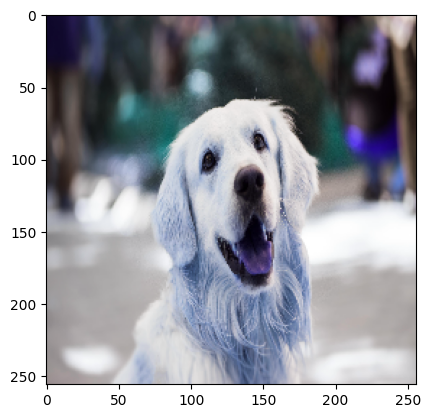

In [ ]:
test_img = cv2.resize(test_img,(256,256))
plt.imshow(test_img)
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[3.8770817e-24]], dtype=float32)